In [2]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [3]:
all_df = pd.read_excel('data/titanic3.xls')

In [4]:
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [5]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [6]:
print('total: ', len(all_df),
      '\ntrain: ', len(train_df), 
      '\ntest: ', len(test_df))

total:  1309 
train:  1034 
test:  275


In [7]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis = 1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(int)
    y_One_Hot_df = pd.get_dummies(data = df, columns = ['embarked'])
    
    ndarray = y_One_Hot_df.values
    Features = ndarray[:, 1:]
    Label = ndarray[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1))
    scaledFeature = minmax_scale.fit_transform(Features)
    
    return scaledFeature, Label

In [23]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

<hr>
建立模型
<hr>

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [10]:
model = Sequential()

W0709 18:48:23.647758  6536 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
model.add(Dense(units = 40,
                input_dim = 9,
                kernel_initializer = 'uniform',
                activation = 'relu'))

W0709 18:50:13.778118  6536 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 18:50:13.780113  6536 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
model.add(Dense(units = 30,
                kernel_initializer = 'uniform',
                activation = 'relu'))

In [13]:
model.add(Dense(units = 1,
                kernel_initializer = 'uniform',
                activation = 'sigmoid'))

<hr>
開始訓練
<hr>

In [17]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

W0709 18:56:33.912636  6536 deprecation.py:323] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
train_history = model.fit(x = train_Features, 
                          y = train_Label, validation_split = 0.1, 
                          epochs = 30, batch_size = 30, verbose = 2)

W0709 18:56:34.716757  6536 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6900 - acc: 0.5774 - val_loss: 0.6709 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6683 - acc: 0.5957 - val_loss: 0.5927 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6112 - acc: 0.6667 - val_loss: 0.4954 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5468 - acc: 0.7634 - val_loss: 0.4634 - val_acc: 0.7596
Epoch 5/30
 - 0s - loss: 0.5074 - acc: 0.7624 - val_loss: 0.4545 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4916 - acc: 0.7645 - val_loss: 0.4405 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4828 - acc: 0.7591 - val_loss: 0.4433 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4795 - acc: 0.7570 - val_loss: 0.4362 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4738 - acc: 0.7634 - val_loss: 0.4284 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4704 - acc: 0.7742 - val_loss: 0.4267 - val_acc: 0.7981
Epoch 11/30
 - 0s - loss: 0.4664 - acc: 0.7613 - val_loss: 0.4242 - val_acc: 0.8077
Epoch 12/30
 - 0s - loss: 0.4644 - acc:

In [19]:
import matplotlib.pyplot as plt
def show_train_histoy(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

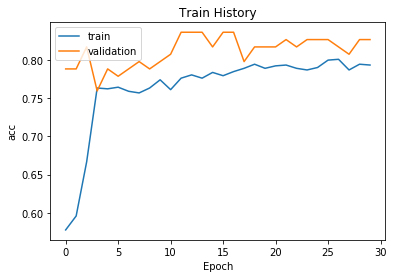

In [20]:
show_train_histoy(train_history, 'acc', 'val_acc')

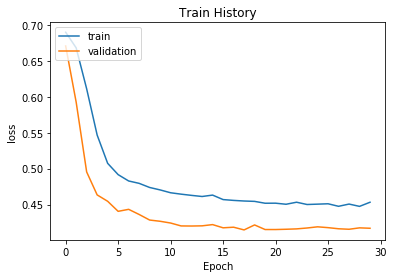

In [21]:
show_train_histoy(train_history, 'loss', 'val_loss')

In [24]:
scores = model.evaluate(x = test_Features, y = test_Label)

275/275 [==============================] - 0s 14us/step


In [26]:
scores[1]

0.8145454549789428